# geopandas: biblioteca para manipulación y análisis de datos vectoriales

[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gf0657-programacionsig/2024-ii/blob/main/contenido/4/geopandas.ipynb)

## Introducción

[geopandas](http://geopandas.org/) es un proyecto de software libre que extiende los tipos de datos de [pandas](http://pandas.pydata.org/) para incorporar operaciones para tipos de datos geométricos (puntos, líneas, polígonos). Se apoya en las bibliotecas [pyogrio](https://pyogrio.readthedocs.io) para acceder a los datos, [shapely](https://github.com/Toblerity/Shapely/) para realizar operaciones geométricas (intersecciones, *joins*, *buffers*, proyecciones, etc.) y [matplotlib](https://matplotlib.org/) para generar gráficos.

geopandas implementa dos estructuras principales de datos:

- [`GeoSeries`](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geoseries): son similares a las `Series` de pandas, pero están diseñadas para contener objetos geométricos como puntos, líneas y polígonos.
- [`GeoDataFrame`](http://geopandas.org/data_structures.html#geodataframe): son una estructuras tabulares (i.e. con filas y columnas) de datos geométricos y no geométricos (ej. textos, números), similares a los `DataFrames` de pandas. Un `GeoDataFrame` puede considerarse un `DataFrame` con una columna de geometrías, la cual se implementa como una `GeoSeries`.

La {numref}`figure-geodataframe` muestra el esquema de un `GeoDataFrame`.

```{figure} img/geodataframe.svg
:name: figure-geodataframe

Esquema de un `GeoDataFrame`. Imagen de [geopandas.org](https://geopandas.org/en/stable/getting_started/introduction.html).
```


## Instalación

### En ambientes locales (ej. conda)

Se recomienda actualizar primero conda y mamba.

```bash
# Actualizar conda y mamba
conda update conda
conda update -c conda-forge mamba
```

geopandas puede instalarse con `pip`, `conda` o `mamba`, desde la línea de comandos del sistema operativo. Solo es necesario hacerlo de una forma. Se recomienda instalar junto con los paquetes owslib (para acceso a geoservicios), shapely (para geoprocesamiento), fiona (para leer y escribir archivos geoespaciales), pyproj (para manejo de proyecciones) y folium (para mapas interactivos).

```bash
# Instalar geopandas y sus bibliotecas asociadas con pip
pip install geopandas owslib shapely fiona pyproj folium

# Instalar geopandas y sus bibliotecas asociadas con conda
conda install -c conda-forge geopandas owslib shapely fiona pyproj folium

# Instalar geopandas y sus bibliotecas asociadas con mamba
mamba install -c conda-forge geopandas owslib shapely fiona pyproj folium
```

### En la nube (ej. Google Colab)

geopandas está preinstalado en Google Colab. Aquí se muestra como instalarlo junto con las otras bibliotecas asociadas, para asegurar la compatilibilidad.

```bash
# Con pip
pip install geopandas owslib shapely fiona pyproj folium
```

## Carga

In [21]:
# Carga de geopandas con el alias gdp
import geopandas as gpd

# Otras bibliotecas

# Carga de pandas con el alias pd
import pandas as pd

# Carga del módulo pyplot de matplotlib con el alias plt
import matplotlib.pyplot as plt

# Carga de la clase WebFeatureService del módulo wfs de owslib
# Permite interactuar con servicios web geoespaciales tipo WFS
from owslib.wfs import WebFeatureService

# Carga de la clase BytesIO del módulo estándar io
# Permite crear un objeto en memoria que actúa como un archivo binario
from io import BytesIO

# Carga de la biblioteca Folium, para mapas interactivos
import folium

## Configuración

In [22]:
# Configuración de pandas para mostrar separadores de miles y 2 dígitos decimales
# Esto también evita la notación científica

pd.set_option('display.float_format', '{:,.2f}'.format)

## Operaciones básicas

Al ser `GeoDataFrame` un clase descenciente de `DataFrame`, todos los métodos disponibles para los dataframes están también disponibles para los geodataframes. Estos últimos cuentan con métodos adicionales para manejar datos espaciales.

### Creación de geodataframes

En esta sección se explican varias maneras de crear un geodataframe.

#### A partir de un dataframe

En el siguiente bloque de código, primero se carga en un dataframe un conjunto de datos de [registros de presencia de pumas (*Puma concolor*)](https://github.com/gf0657-programacionsig/2024-ii/blob/main/datos/gbif/gbif-puma-concolor-cri.csv) proveniente de un archivo CSV. Luego, con el constructor de la clase `GeoDataFrame` y el método [`geopandas.points_from_xy()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html), se crea un geodataframe con geometrías de puntos.

In [23]:
# Crear un dataframe con registros de presencia de pumas
pumas_df = pd.read_csv(
    'https://raw.githubusercontent.com/gf0657-programacionsig/2024-ii/refs/heads/main/datos/gbif/gbif-puma-concolor-cri.csv'
)

# Crear un geodataframe a partir del dataframe
pumas_gdf = gpd.GeoDataFrame(
    pumas_df, 
    geometry=gpd.points_from_xy(pumas_df.decimalLongitude, pumas_df.decimalLatitude),
    crs='EPSG:4326'
)

# Mostrar los primeros registros del geodataframe
pumas_gdf.head()

species            eventDate locality  decimalLongitude  \
0  Puma concolor  2019-04-24T02:12:33      NaN            -83.86   
1  Puma concolor           2024-10-04      NaN            -85.61   
2  Puma concolor     2024-10-02T05:41      NaN            -84.38   
3  Puma concolor  2024-09-06T14:54:21      NaN            -83.55   
4  Puma concolor     2024-08-26T21:26      NaN            -84.01   

   decimalLatitude                    geometry  
0             9.98   POINT (-83.86202 9.98061)  
1            10.88  POINT (-85.60825 10.87629)  
2             9.61   POINT (-84.38153 9.61412)  
3             8.53   POINT (-83.54665 8.53123)  
4            10.43  POINT (-84.00935 10.42933)

El método [`geopandas.GeoDataFrame.plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) muestra un mapa estático de un geodataframe.

<Axes: >

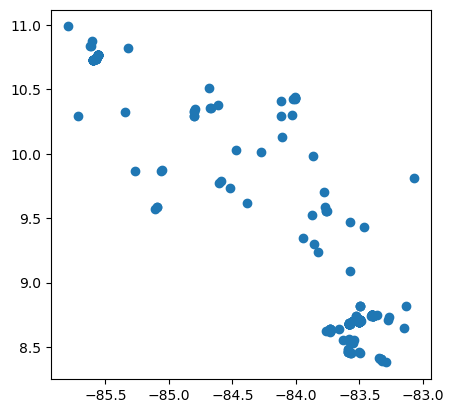

In [24]:
# Mostrar un mapa estático
pumas_gdf.plot()

El método [`geopandas.GeoDataFrame.explore()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html) muestra un mapa interactivo basado en la biblioteca [folium](https://python-visualization.github.io/folium).

In [25]:
# Mostrar un mapa interactivo
pumas_gdf.explore()

#### A partir de un archivo geoespacial

La función [`geopandas.read_file()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html) retorna un geodataframe a partir de un archivo geoespacial. Los formatos de archivo que acepta la función son los [formatos vectoriales soportados por la biblioteca GDAL](https://gdal.org/en/latest/drivers/vector/).

En el siguiente bloque de código, se crea un geodataframe con los datos de países de Natural Earth almacenados en un archivo en formato GeoPackage (GPKG).

In [26]:
# Crear un geodataframe con datos y polígonos de paises
paises_gdf = gpd.read_file(
    'https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/natural-earth/paises.gpkg'
)

# Crear un índice
paises_gdf.set_index('ADM0_ISO', inplace=True)

Se realiza una unión (*join*) con los datos de esperanza de vida al nacer.

In [27]:
# Crear un dataframe con los datos de esperanza de vida al nacer
esperanza_vida_df = pd.read_csv(
    "https://raw.githubusercontent.com/gf0657-programacionsig/2024-ii/refs/heads/main/datos/world-bank/paises-esperanza-vida.csv"
)

# Reducir columnas
esperanza_vida_df = esperanza_vida_df[['Country Code', '2022']]

# Crear un índice
esperanza_vida_df.set_index('Country Code', inplace=True)

# Unir el geodataframe de países y el dataframe de esperanza de vida
paises_gdf = paises_gdf.join(esperanza_vida_df, how="left")

# Cambiar el nombre de la nueva columna
paises_gdf.rename(columns={'2022': 'LIFE_EXPECTANCY'}, inplace=True)

# Mostrar los primeros registros del geodataframe
paises_gdf.head()

NAME      CONTINENT REGION_UN           SUBREGION  \
ADM0_ISO                                                           
IDN       Indonesia           Asia      Asia  South-Eastern Asia   
MYS        Malaysia           Asia      Asia  South-Eastern Asia   
CHL           Chile  South America  Americas       South America   
BOL         Bolivia  South America  Americas       South America   
PER            Peru  South America  Americas       South America   

                          REGION_WB                   ECONOMY  \
ADM0_ISO                                                        
IDN             East Asia & Pacific  4. Emerging region: MIKT   
MYS             East Asia & Pacific      6. Developing region   
CHL       Latin America & Caribbean   5. Emerging region: G20   
BOL       Latin America & Caribbean   5. Emerging region: G20   
PER       Latin America & Caribbean   5. Emerging region: G20   

                      INCOME_GRP        POP_EST   GDP_MD  \
ADM0_ISO                                                   
IDN       4. Lower middle income 270,625,568.00  1119190   
MYS       3. Upper middle income  31,949,777.00   364681   
CHL       3. Upper middle income  18,952,038.00   282318   
BOL       4. Lower middle income  11,513,100.00    40895   
PER       3. Upper middle income  32,510,453.00   226848   

                                                   geometry  LIFE_EXPECTANCY  
ADM0_ISO                                                                      
IDN       MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...            68.25  
MYS       MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...            76.26  
CHL       MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...            79.52  
BOL       POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...            64.93  
PER       MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...            73.39

Se crea un subconjunto para los países de Asia y se muestran [mapas de coropletas](https://es.wikipedia.org/wiki/Mapa_coropl%C3%A9tico) para la variable de esperanza de vida al nacer.

<Axes: >

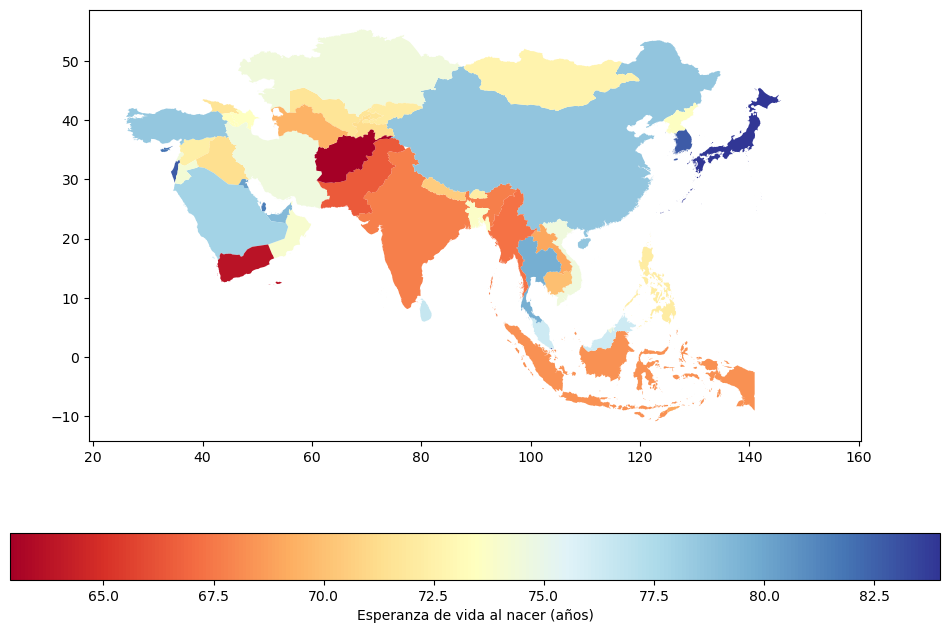

In [28]:
# Crear un subconjunto de países de Asia
paises_africa_gdf = paises_gdf[paises_gdf['CONTINENT'] == 'Asia']

# Mostrar un mapa estático
paises_africa_gdf.plot(
    column='LIFE_EXPECTANCY',
    cmap='RdYlBu',
    legend=True,
    legend_kwds={
        'label': "Esperanza de vida al nacer (años)", 
        'orientation': "horizontal"
    },
    figsize=(12, 8)
)

In [29]:
# Mostrar un mapa interactivo
paises_africa_gdf.explore(
    column='LIFE_EXPECTANCY',
    cmap='RdYlBu',
    legend=True,
    legend_kwds={
        'caption': "Esperanza de vida al nacer (años)", 
        'orientation': "horizontal"
    },
    tooltip=['NAME', 'LIFE_EXPECTANCY'] # elementos de datos de la ventana tooltip
)

**Ejercicios**

1. Con las funciones `plot()` y `explore()` de GeoPandas, elabore un mapa estático y un mapa dinámico de coropletas que muestren la variable de mortalidad infantil en el continente africano. Utilice los conjuntos de datos:
   
   - Polígonos de países de Natural Earth (`https://github.com/gf0657-programacionsig/2024-ii/raw/refs/heads/main/datos/natural-earth/paises.gpkg`).
   - Indicador de mortalidad infantil del Banco Mundial (`https://raw.githubusercontent.com/gf0657-programacionsig/2024-ii/refs/heads/main/datos/world-bank/paises-tasa-mortalidad-infantil.csv`). Utice los datos del año 2022. 

#### A partir de servicios web geoespaciales

La bibliioteca [OWSLib](https://owslib.readthedocs.io) permite el acceso a los servicios web geoespaciales (geoservicios) del [Open Geospatial Consortium (OGC)](https://ogc.org/) desde programas en Python. La clase [WebFeatureService](https://owslib.readthedocs.io/en/latest/usage.html#wfs) proporciona acceso a [Web Feature Service (WFS)](https://es.wikipedia.org/wiki/Web_Feature_Service).

En el siguiente bloque de código se accede la capa de áreas de conservación publicada como un servicio WFS por el [Sistema Nacional de Áreas de Conservación (Sinac)](https://www.sinac.go.cr).

In [30]:
# Conexión al servicio WFS
wfs_url = 'http://geos1pne.sirefor.go.cr/wfs'
wfs_version = '1.1.0'
wfs = WebFeatureService(url=wfs_url, version=wfs_version)

# Obtener la capa de áreas de conservación
capa = 'PNE:areas_conservacion'
respuesta = wfs.getfeature(typename=capa, outputFormat='application/json')

# Leer la respuesta en un GeoDataFrame
areas_conservacion_gdf = gpd.read_file(BytesIO(respuesta.read()))

# Mostrar las primeras filas del GeoDataFrame
areas_conservacion_gdf.head()

id  objectid codigo_ac            nombre_ac siglas_ac  \
0  areas_conservacion.1         1      AC06                  Osa     ACOSA   
1  areas_conservacion.2         2      AC02            Tempisque       ACT   
2  areas_conservacion.3         3      AC01           Guanacaste       ACG   
3  areas_conservacion.4         4      AC04           Tortuguero      ACTo   
4  areas_conservacion.5         5      AC07  La Amistad Pacifico     ACLAP   

               regmplan              decreto    area_ha  shape_leng  \
0         Region Brunca  Decreto 40054-MINAE 429,575.66  793,618.26   
1      Region Chorotega  Decreto 40054-MINAE 515,162.50  606,461.48   
2      Region Chorotega  Decreto 40054-MINAE 293,697.02  468,446.90   
3  Region Huetar Caribe  Decreto 40054-MINAE 305,299.55  338,700.74   
4         Region Brunca  Decreto 40054-MINAE 555,789.58  531,202.92   

        shape_area                                           geometry  
0 4,295,756,625.56  POLYGON ((620682.687 965879.75, 620687.187 965...  
1 5,151,625,030.46  POLYGON ((343047.817 1154773.753, 343093.54 11...  
2 2,936,970,221.91  POLYGON ((351678.469 1230661.157, 365705.897 1...  
3 3,052,995,528.69  POLYGON ((533392.762 1209595.593, 533542.044 1...  
4 5,557,895,783.44  POLYGON ((555841.926 1063088.417, 560995.667 1...

Nótese que el geodataframe usa el sistema de referencia de coordenadas (CRS) con EPSG 5367 (CR05 / CRTM05). Para combinarlo en mapas con el geodataframe de pumas, se convierte al EPSG 4326 (WGS84).

In [31]:
# CRS actual de areas_conservacion_gdf
areas_conservacion_gdf.crs

<Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
# Convertir areas_conservacion_gdf al CRS WGS84
areas_conservacion_wgs84_gdf = areas_conservacion_gdf.to_crs(epsg=4326)

# Nuevo CRS de areas_conservacion_gdf
areas_conservacion_wgs84_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

En el siguiente bloque de código, se genera un mapa estático que muestra las áreas de conservación y los registros de presencia de pumas. Primero, geodataframe de áreas de conservación se convierte al CRS con EPSG 4326 (WGS84).

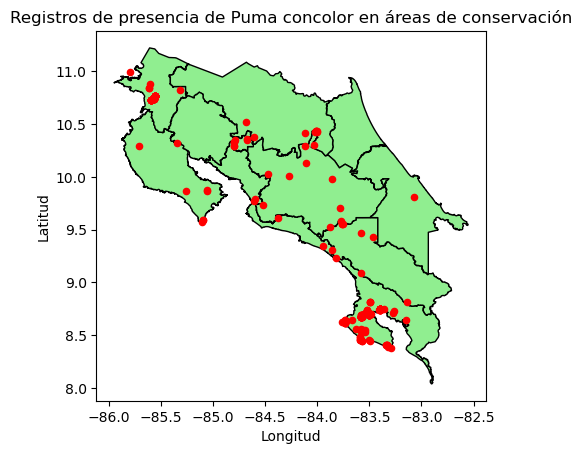

In [33]:
# Crear el mapa
fig, ax = plt.subplots()

# Dibujar la capa de áreas de conservación
areas_conservacion_wgs84_gdf.plot(ax=ax, color='lightgreen', edgecolor='black')

# Dibujar la capa de registros de presencia de pumas
pumas_gdf.plot(ax=ax, color='red', markersize=20)

# Configurar el título y las etiquetas de los ejes
plt.title('Registros de presencia de Puma concolor en áreas de conservación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el mapa
plt.show()

Seguidamente, se crea un mapa interactivo con las mismas capas que el anterior.

In [34]:
# Crear el mapa interactivo con las áreas de conservación
m = areas_conservacion_wgs84_gdf.explore(
    name='Áreas de conservación',
    tooltip=['nombre_ac', 'siglas_ac'],
    popup=True,
    style_kwds={
        'fillColor': 'lightgreen',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.5
    }
)

# Añadir los registros de pumas al mapa
pumas_gdf.explore(
    m=m, # se usa el mapa que se creó en la instrucción anterior
    name='Registros de presencia de pumas',
    marker_type='circle',
    marker_kwds={'radius': 20, 'color': 'red'},
    tooltip=['species', 'locality', 'eventDate'],
    popup=True
)

# Agregar un control de capas al mapa
folium.LayerControl().add_to(m)

# Mostrar el mapa interactivo
m

**Ejercicios**

1. Con las funciones `plot()` y `explore()` de GeoPandas, elabore un mapa estático y un mapa dinámico que muestren ambos una capa de polígonos y una capa de puntos. Se sugiere elegir fuentes de datos de los siguientes recursos:
   
   - Servicios WFS del [Sistema Nacional de Información Territorial (SNIT)](https://www.snitcr.go.cr/).
   - Registros de presencia de especies agrupados por el [Sistema Mundial de Información en Biodiversidad (GBIF)](https://www.gbif.org/).

### Operaciones geoespaciales

#### Mediciones

Debe tenerse en cuenta que la unidad de medida de las diferentes mediciones que pueden realizarse en un geodataframe depende de su sistema de coordenadas. Si un geodataframe usa coordenadas geográficas (e.j. EPSG:4326), su área se calcula en grados cuadrados, lo cual no es práctico. Por lo tanto, para medir se prefieren sistemas de coordenadas proyectados (e.j. UTM, CRTM05), las cuales usan unidades como metros o pies.

##### Área

La propiedad [`geopandas.GeoSeries.area`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.area.html) retorna una serie que contiene el área de cada geometría de un geodataframe, expresada en las unidades de su CRS.

En el siguiente bloque de código se obtienen las áreas de las áreas de conservación, las cuales usan el CRS CRTM05 y su unidad de medida es metros.

In [ ]:
# Crear una columna con el área (en m2) de cada área de conservación
areas_conservacion_gdf['area_m2'] = areas_conservacion_gdf.geometry.area

# Crear una columna con el área (en ha) de cada área de conservación
areas_conservacion_gdf['area_ha'] = areas_conservacion_gdf.area_m2 / 10000

# Crear una columna con el área (en km2) de cada área de conservación
areas_conservacion_gdf['area_km2'] = areas_conservacion_gdf.area_ha / 100

# Despliegue de las áreas de conservación en orden descendente de área (m2)
areas_conservacion_gdf[['nombre_ac', 'area_m2', 'area_ha', 'area_km2']].sort_values(
    by='area_m2', 
    ascending=False
)

##### Longitud

La propiedad [`geopandas.GeoSeries.lenght`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.length.html) retorna una serie que contiene la longitud de cada geometría de un geodataframe, expresada en las unidades de su CRS.

En el siguiente bloque de código se obtiene la longitud de la vía férrea con el nombre "Ferrocarril Nacional del Atlántico".

In [ ]:
# Conexión al servicio WFS IGN 200000
wfs_url = 'https://geos.snitcr.go.cr/be/IGN_200/wfs'
wfs_version = '1.1.0'
wfs = WebFeatureService(url=wfs_url, version=wfs_version)

# Obtener la capa de vías férreas
capa = 'IGN_200:viaferrea_200k'
respuesta = wfs.getfeature(typename=capa, outputFormat='application/json')

# Obtener el GeoDataFrame de vías férreas
vias_ferreas_gdf = gpd.read_file(BytesIO(respuesta.read()))

# Crear una columna con la longitud (en m) de la geometría
vias_ferreas_gdf['longitud_m'] = vias_ferreas_gdf.geometry.length

# Obtener el geodataframe del Ferrocarril Nacional del Atlántico
ferrocarril_atlantico_gdf = vias_ferreas_gdf[vias_ferreas_gdf['nombre'] == 'Ferrocarril Nacional del Atlántico']

# Longitud (en m) del Ferrocarril Nacional del Atlántico
longitud_ferrocarril_atlantico = ferrocarril_atlantico_gdf.iloc[0]["longitud_m"]
print(f'Longitud del Ferrocarril Nacional del Atlántico: {longitud_ferrocarril_atlantico:.2f} m')

#### Predicados espaciales

Los predicados espaciales (también conocidos como relaciones espaciales o relaciones topológicas) son funciones que determinan si cierta condición espacial se cumple entre dos geometrías, como por ejemplo si una geometría está dentro de otra, si se intersectan o si se tocan, entre otras. Los predicados espaciales retornan valores booleanos (`True` o `False`).

Algunos de los predicados espaciales más comunes en GeoPandas son:

- `equals`: Retorna `True` si las geometrías son exactamente iguales.
- `contains`: Retorna `True` si una geometría contiene completamente a otra.
- `within`: Retorna `True` si una geometría está completamente dentro de otra.
- `touches`: Retorna `True` si las geometrías se tocan en los bordes pero no se solapan.
- `intersects`: Retorna `True` si las geometrías tienen al menos un punto en común.
- `crosses`: Retorna `True` si las geometrías se cruzan.
- `overlaps`: Retorna `True` si las geometrías se traslapan parcialmente.

Una forma de aplicar los predicados espaciales es mediante una unión (*join*) espacial. Como se estudió en capítulos previos, una unión “no espacial” de dos conjuntos de datos se basa en una o varias columnas que están presentes en ambos conjuntos. Las uniones espaciales se basan en un principio similar pero, en lugar de columnas, la unión se realiza a través de un predicado espacial.

En GeoPandas, la unión de datos espaciales se implementa a través de la función [geopandas.GeoDataFrame.sjoin()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.sjoin.html), la cual recibe en el argumento `predicate` el tipo de predicado espacial a utilizar.

Por ejemplo, en el siguiente bloque de código se obttienen las áreas silvestres protegidas (ASP) que cumplen con varios predicados espaciales con respecto al área de conservación Arenal Tempisque (ACAT).

In [ ]:
# Conexión al servicio WFS del Sinac
wfs_url = 'http://geos1pne.sirefor.go.cr/wfs'
wfs_version = '1.1.0'
wfs = WebFeatureService(url=wfs_url, version=wfs_version)

# Obtener la capa de ASP
capa = 'PNE:areas_silvestres_protegidas'
respuesta = wfs.getfeature(typename=capa, outputFormat='application/json')

# Obtener el GeoDataFrame de ASP
asp_gdf = gpd.read_file(BytesIO(respuesta.read()))

# Obtener el geodataframe de ACAT
acat_gdf = areas_conservacion_gdf[areas_conservacion_gdf['siglas_ac'] == 'ACAT']

# ASP que se intersecan con ACAT
asp_intersects_acat_gdf = asp_gdf.sjoin(acat_gdf, predicate='intersects')

# ASP totalmente contenidas en ACAT
asp_within_acat_gdf = asp_gdf.sjoin(acat_gdf, predicate='within')

# ASP que se traslapan parcialmente con ACAT
asp_overlaps_acat_gdf = asp_gdf.sjoin(acat_gdf, predicate='overlaps')

Los resultados pueden apreciarse en el siguiente mapa.

In [ ]:
# Crear el mapa interactivo con el polígono de ACAT
m = acat_gdf.explore(
    name='ACAT',
    tooltip=['nombre_ac', 'siglas_ac'],
    popup=True,
    style_kwds={
        'fillColor': 'lightgreen',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.5
    }
)

# ASP que se intersecan con ACAT
asp_intersects_acat_gdf.explore(
    m=m,
    name='ASP que se intersecan con ACAT',
    tooltip=['nombre_asp'],
    popup=True,
    style_kwds={
        'fillColor': 'lightred',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.5
    }
)

# ASP totalmente contenidas en ACAT
asp_within_acat_gdf.explore(
    m=m,
    name='ASP totalmente contenidas en ACAT',
    tooltip=['nombre_asp'],
    popup=True,
    style_kwds={
        'fillColor': 'lightblue',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.5
    }
)

# ASP que se traslapan parcialmente con ACAT
asp_overlaps_acat_gdf.explore(
    m=m,
    name='ASP que se traslapan parcialmente con ACAT',
    tooltip=['nombre_asp'],
    popup=True,
    style_kwds={
        'fillColor': 'lightyellow',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.5
    }
)

# Agregar un control de capas al mapa
folium.LayerControl().add_to(m)

# Mostrar el mapa interactivo
m